<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

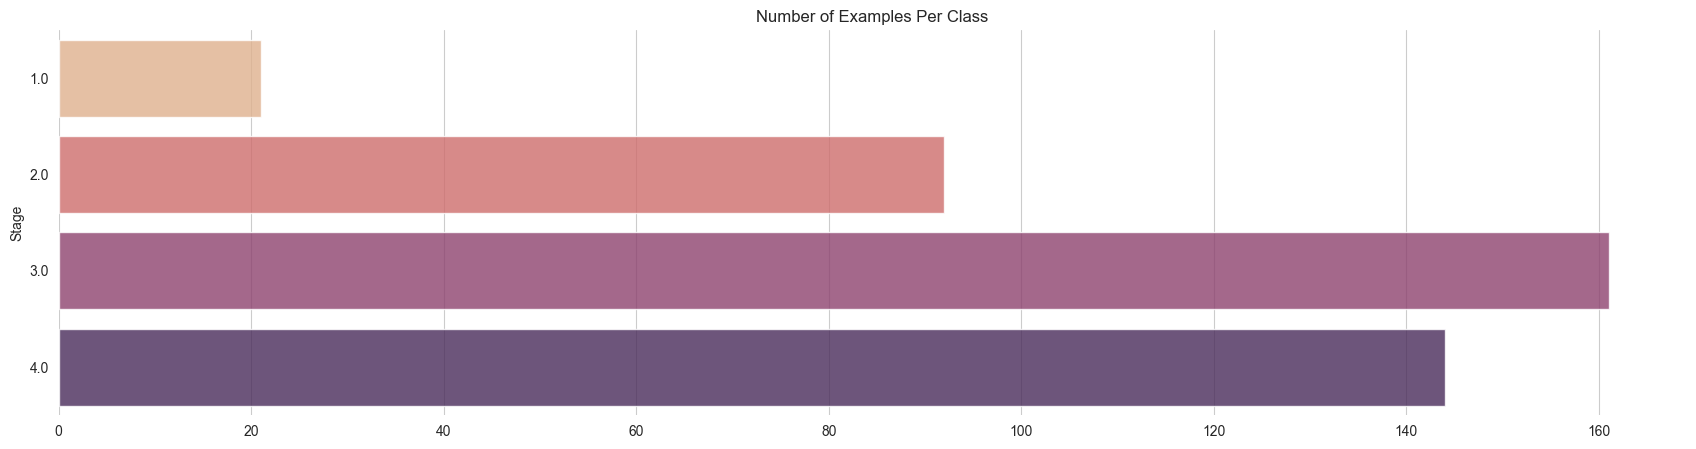

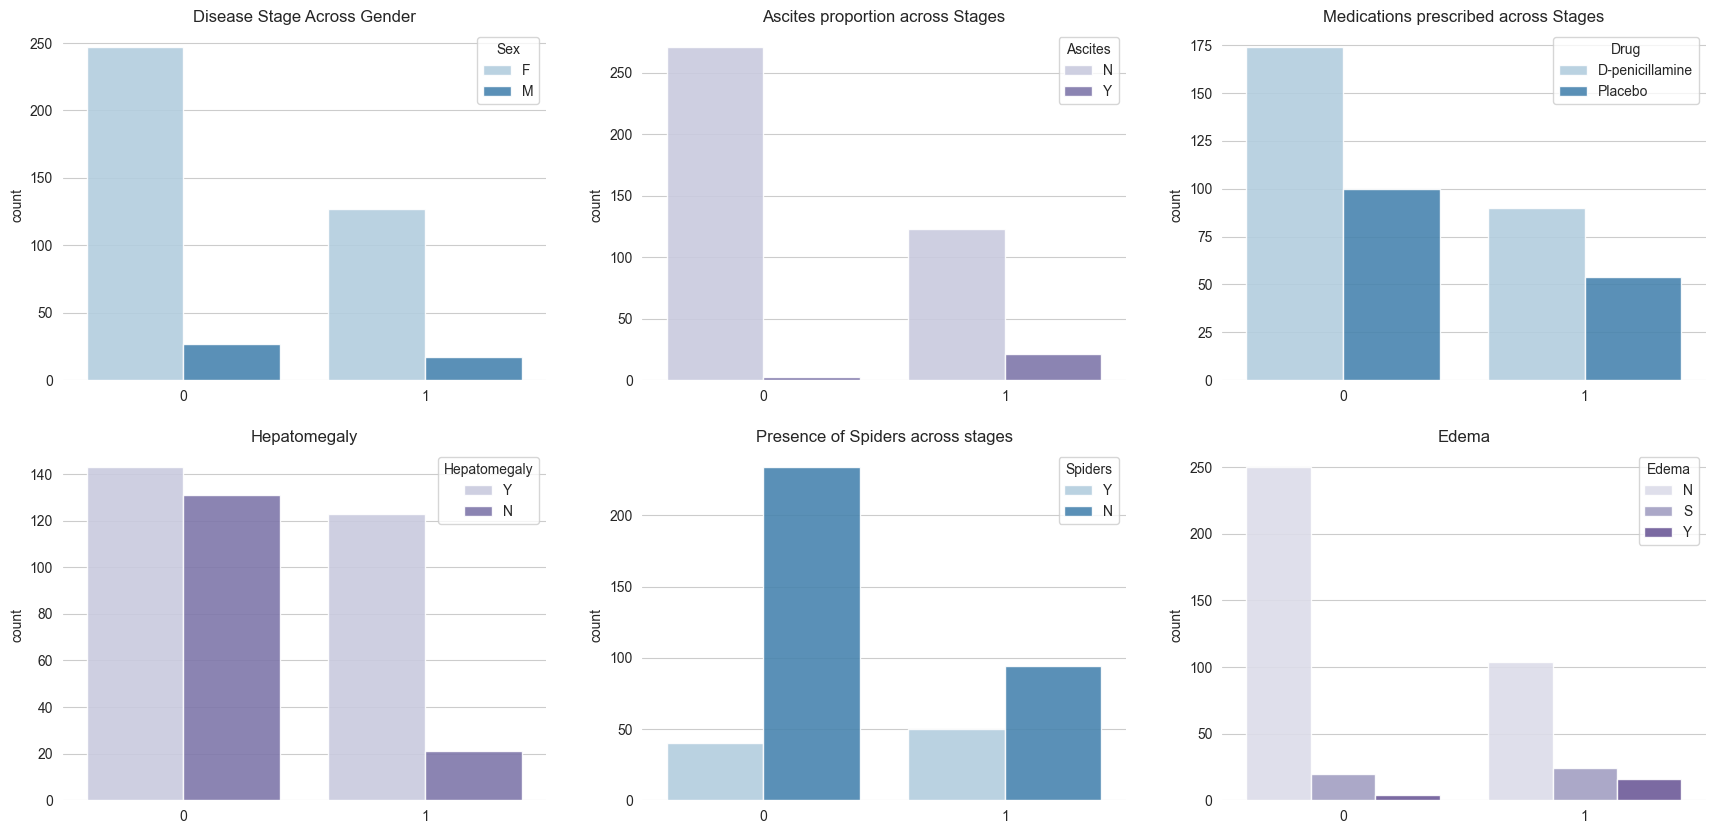

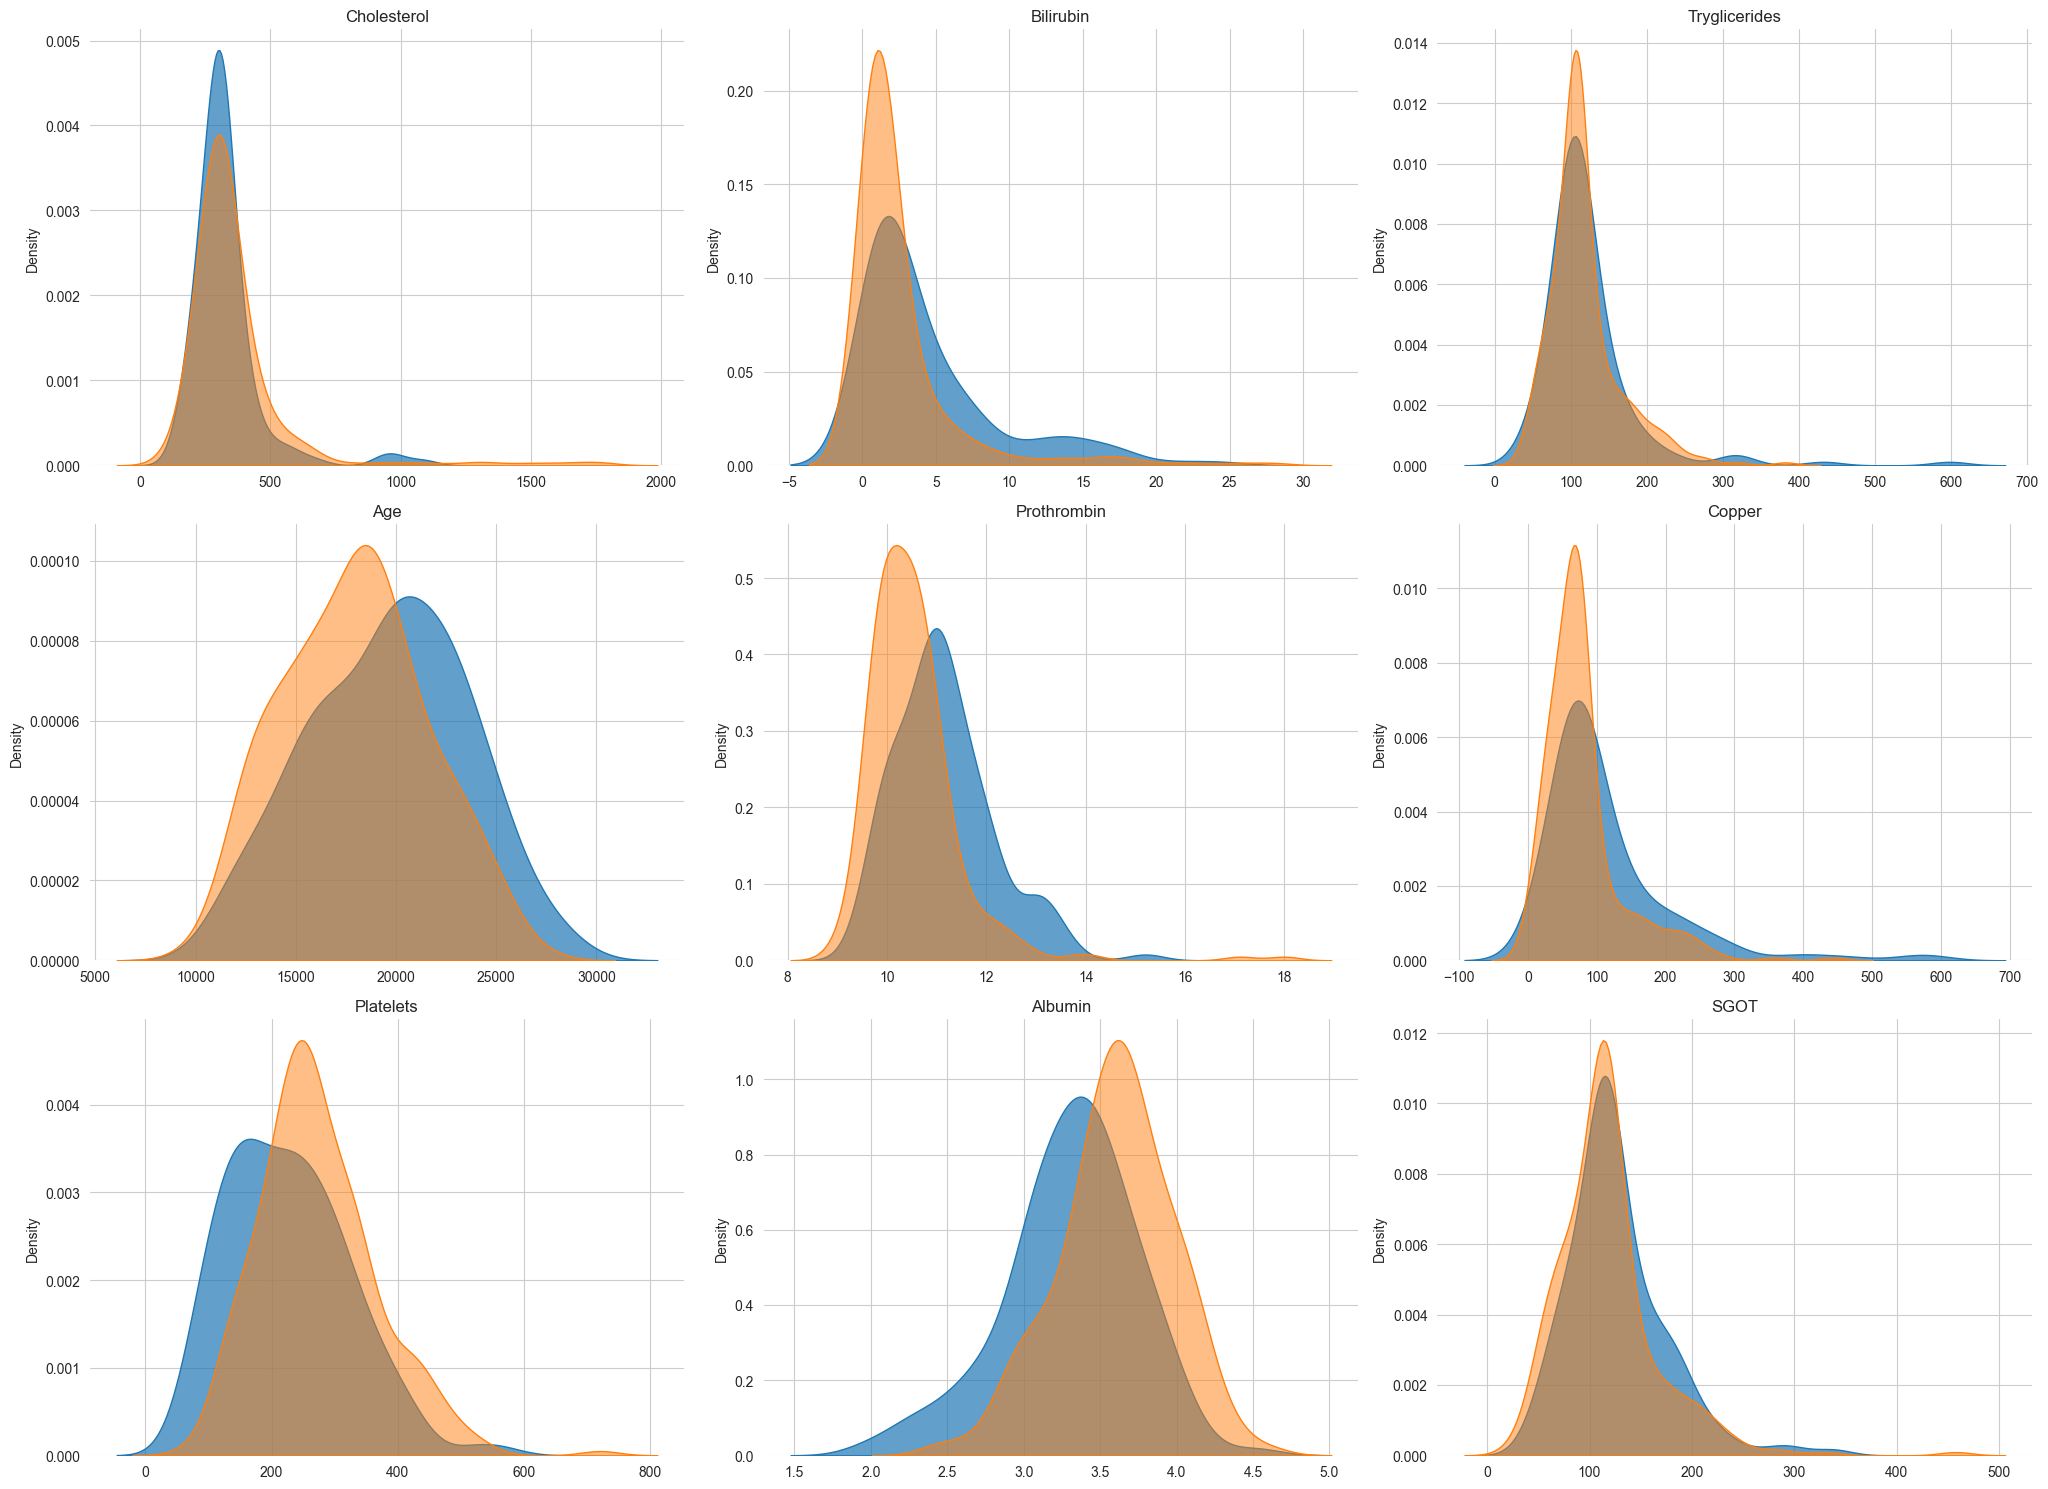

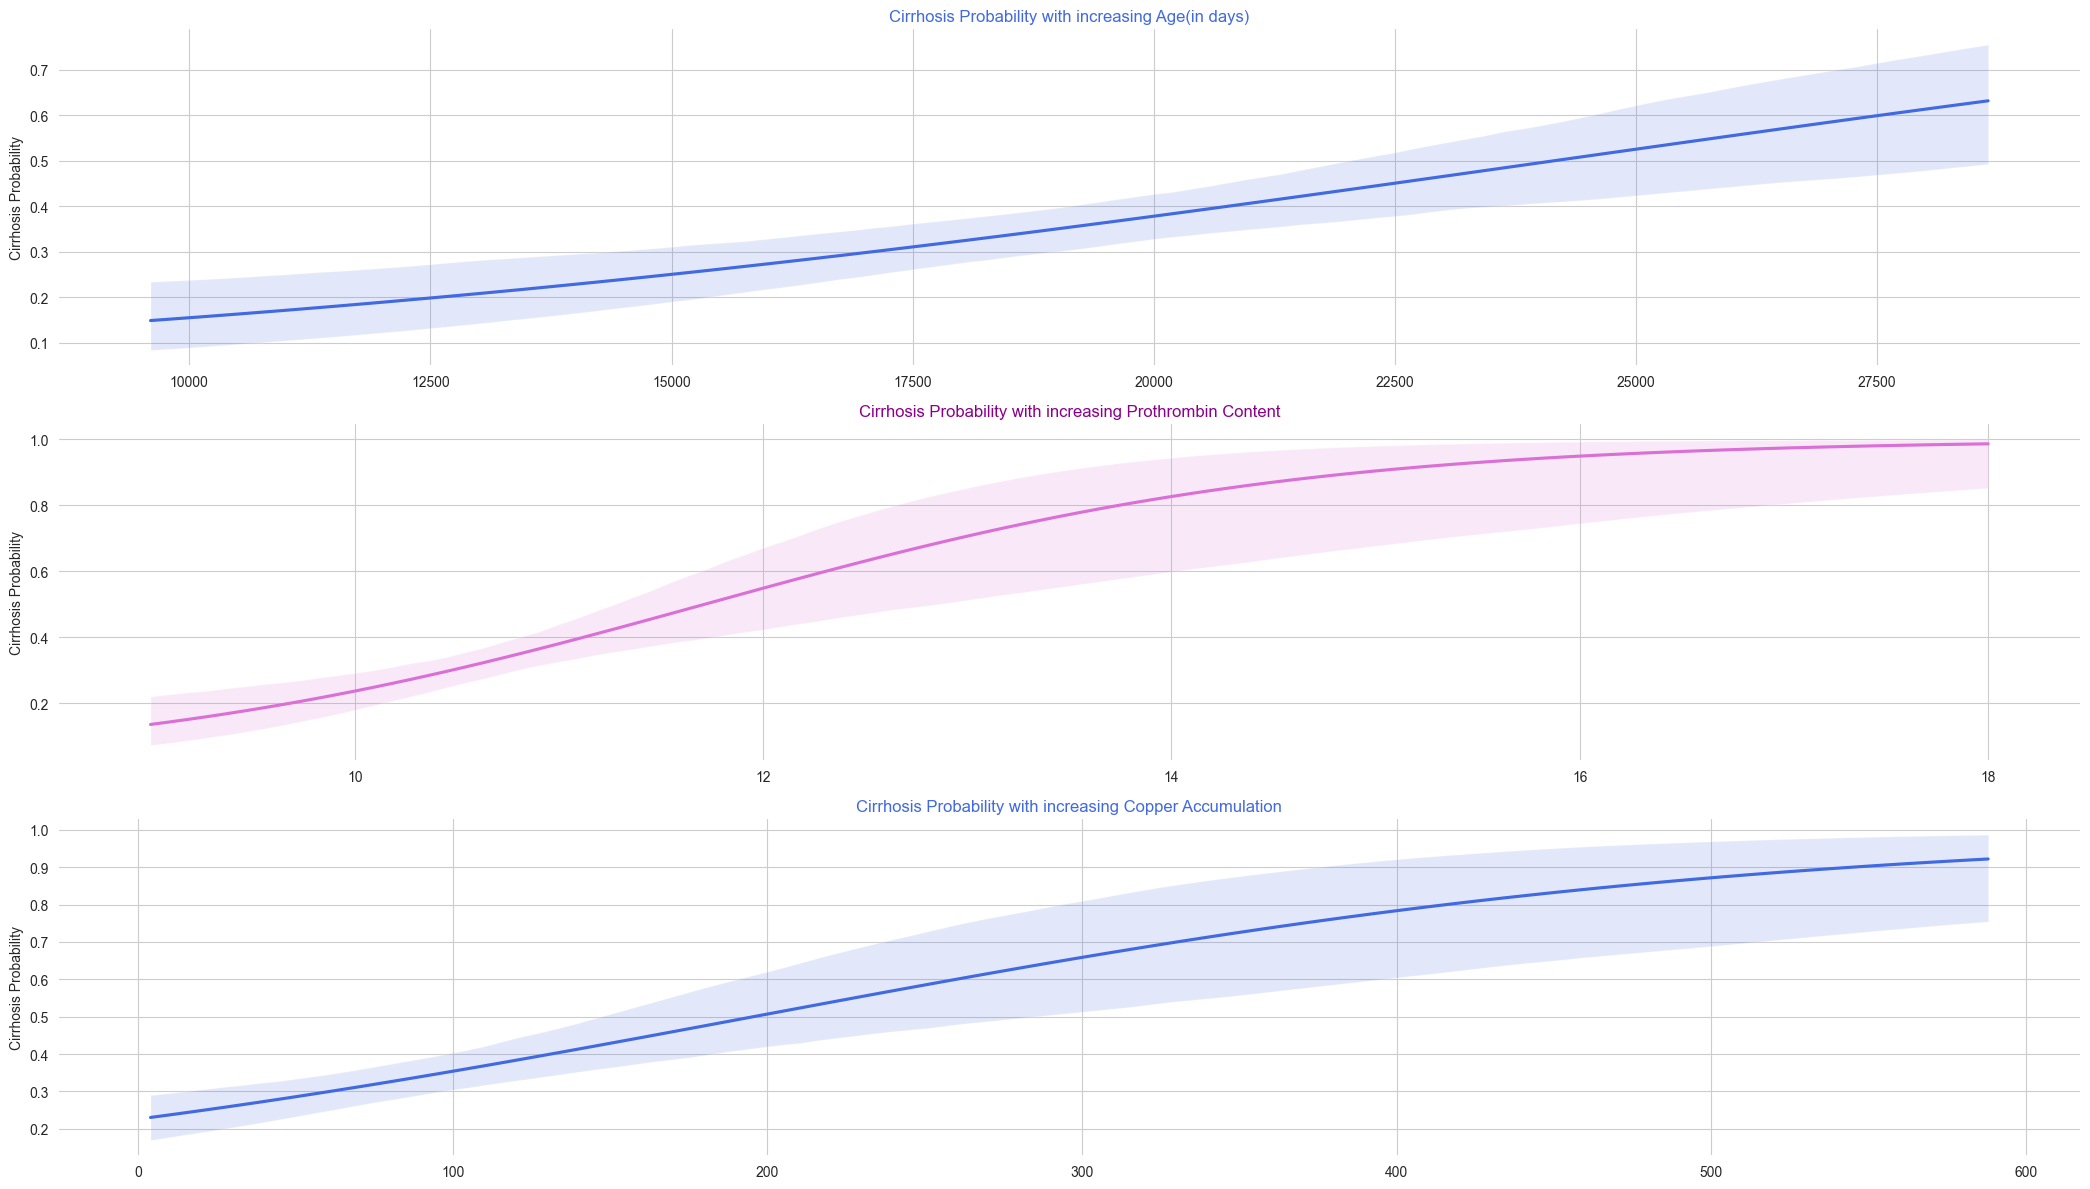

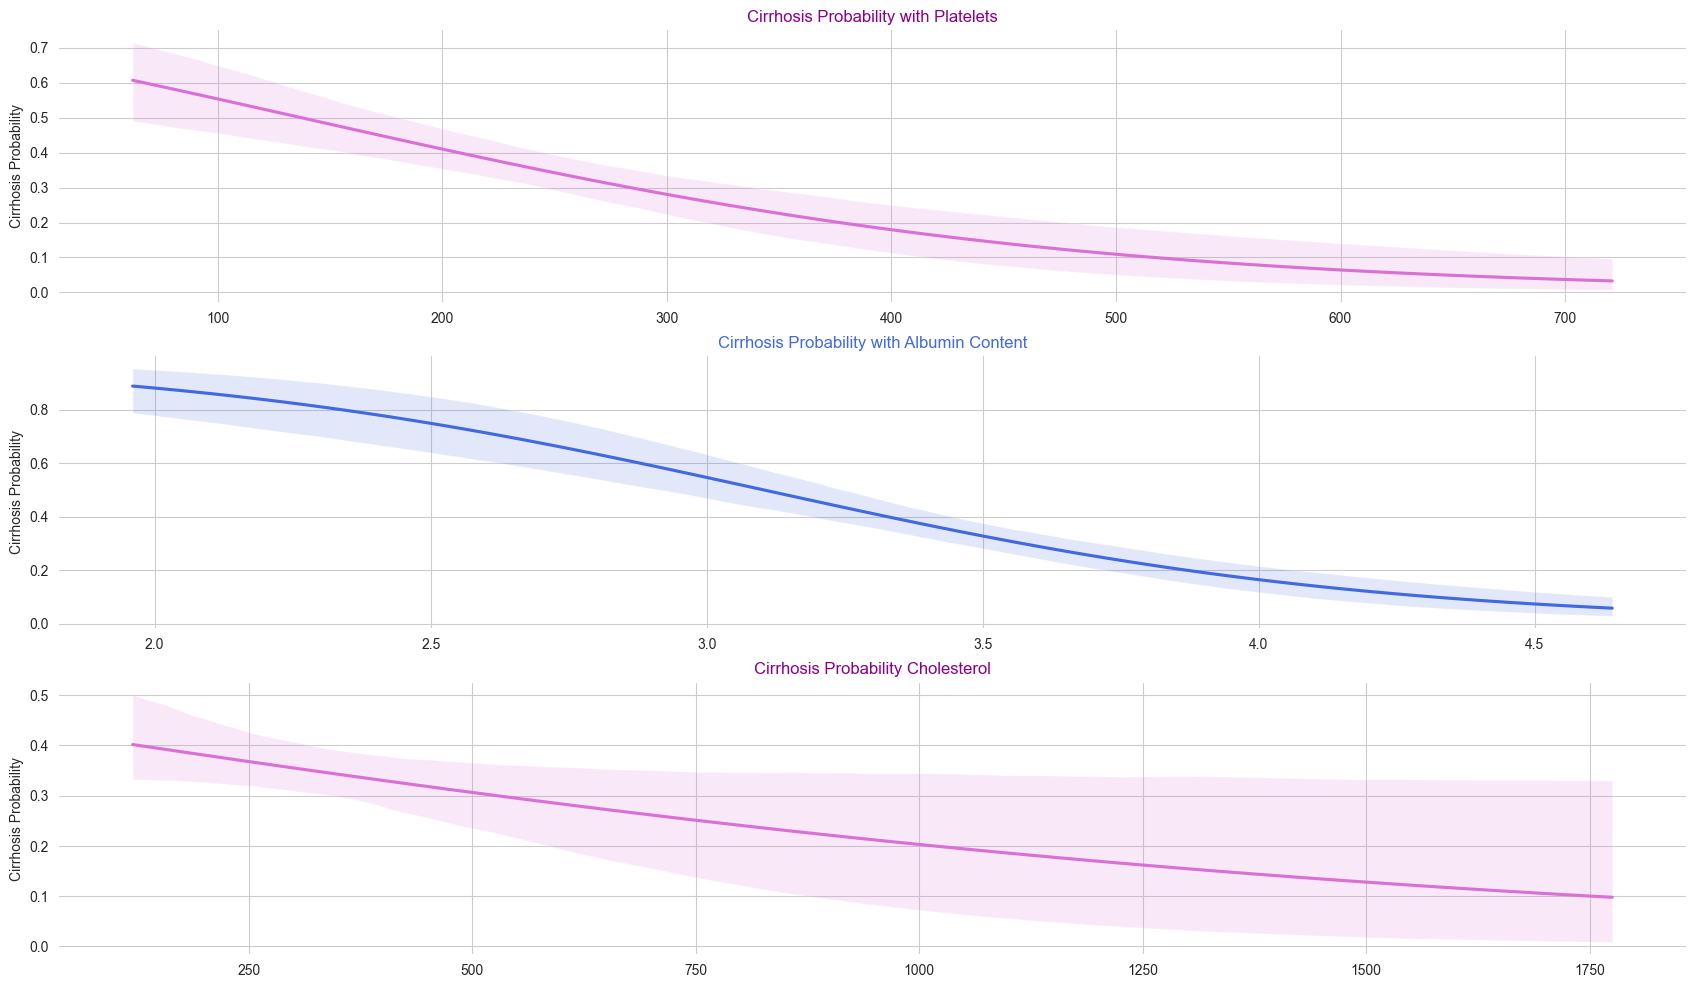

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logestic Regression Mean Accuracy =  70.32520325203252 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41

AUC :  0.6507936507936508


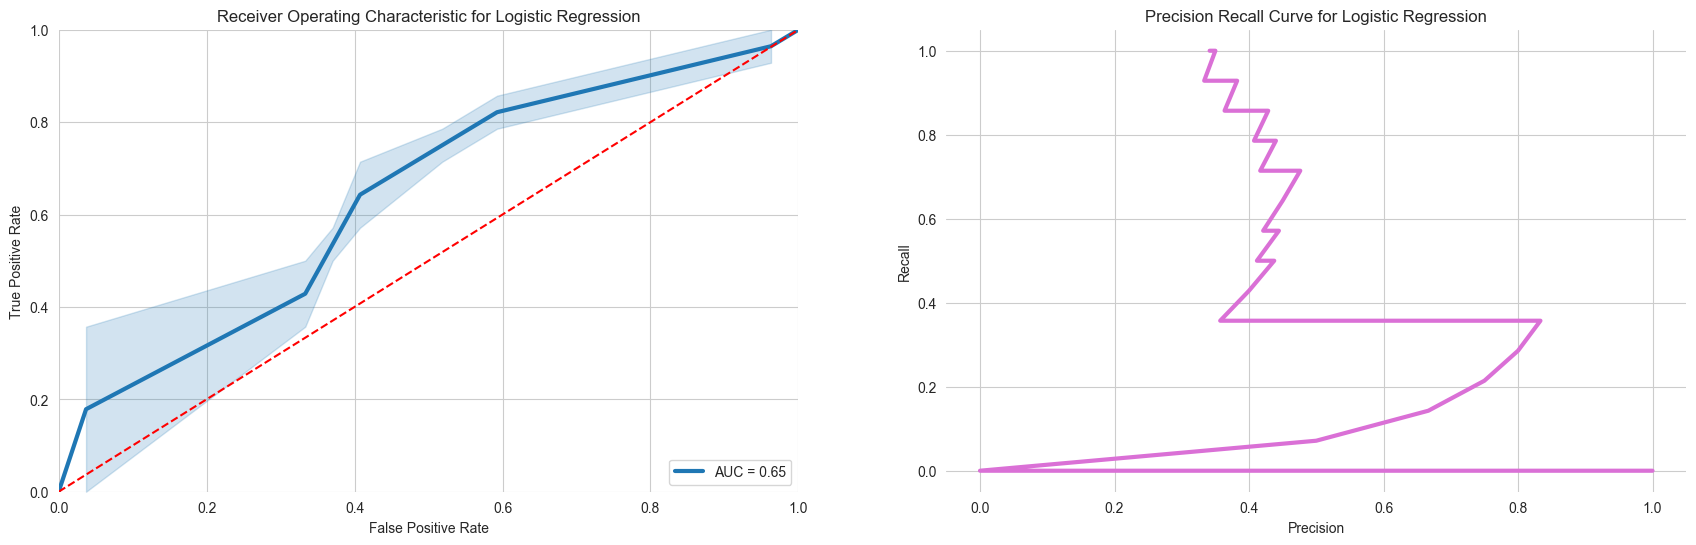

In [6]:
%run "logistic-regression.ipynb"

## Lets try Gradient Boosted Classifier from **XGboost**.

In [7]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  model.fit(X_train, y_train)
  score = model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc)*100,"%")

For Fold 1 the accuracy is 0.7619047619047619
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.7380952380952381
For Fold 4 the accuracy is 0.7619047619047619
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.7619047619047619
For Fold 8 the accuracy is 0.7857142857142857
For Fold 9 the accuracy is 0.7073170731707317
For Fold 10 the accuracy is 0.7560975609756098

XGboost model Mean Accuracy =  76.06271777003484 %


## Testing and scores for XGBoost

In [8]:
from sklearn.metrics import classification_report
XGB_model_predict = model.predict(test)
XGB_model_predict_proba = model.predict_proba(test)

print(classification_report(y.iloc[test_index], XGB_model_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.70      0.50      0.58        14

    accuracy                           0.76        41
   macro avg       0.74      0.69      0.71        41
weighted avg       0.75      0.76      0.74        41



## AUC and ROC 

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], XGB_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], XGB_model_predict_proba[:,1]))

AUC :  0.7433862433862434


Text(0.5, 1.0, 'Precision Recall Curve')

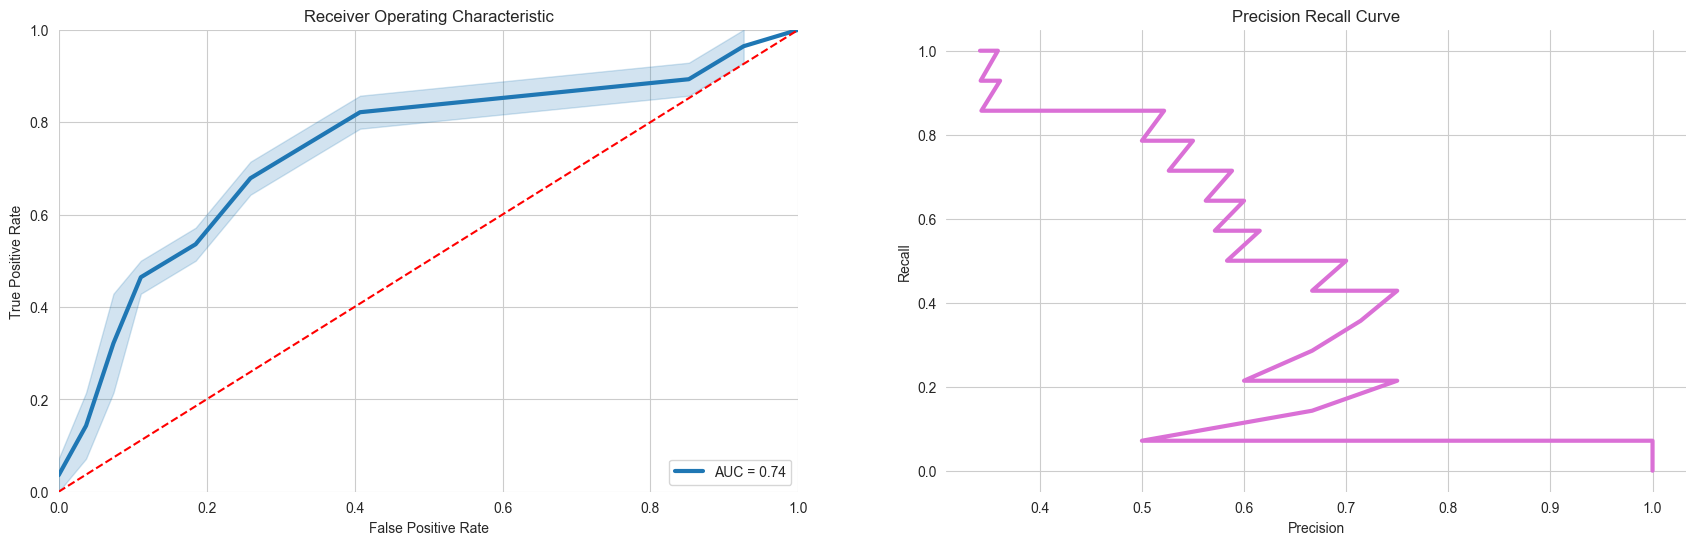

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(21, 6))

plt.subplot(1, 2, 1)
plt.title('Receiver Operating Characteristic')
sns.lineplot(x=fpr, y=tpr, label='AUC = %0.2f' % roc_auc, linewidth=3)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y.iloc[test_index], XGB_model_predict_proba[:, 1])

plt.subplot(1, 2, 2)
plt.plot(precision, recall, linewidth=3, color='orchid')
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')


## Thats a significant improvement over the logestic regression. We now have about **0.74 AUC with about 74% accuracy**. This is pretty remarkable considering we only have about **400 training examples!**